#Limpieza de datos

El archivo WineQT.csv contiene un total de 1,143 registros (filas) y un total de 13 columnas - las cuales estan completas ( sin valores nulos)

columnas involucradas:

1. fixed acidity : Acidez fija ( cantidad de acidos no volatiles) - es tipo float
2. volatile acidity : Acides volatol( acido acetico que afecta el olor del vino ) - es de tipo float
3. citric acid : cantidad acido nitrico - float
4. residual sugar : azucar residual  - float
5. chlorides : contenido clorurosos
6. free sulfur dioxide : dioxido de azufre libre - float
7. total sulfur dioxide : dioxido der azufre total - float
8. density : densidad del vino - float
9. pH : nivel de acides general -float
10. sulphates  sufatos - float
11. alcohol :  porcenmtaje de alcohol en volumen  - float
12. quality puntuacion de calidad de vino -int
13. Id : identificador unido de registro

In [1]:
#Limpieza de datos

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
ruta = "WineQT.csv"
data = pd.read_csv(ruta)


FileNotFoundError: [Errno 2] No such file or directory: 'WineQT.csv'

In [ ]:
print(data.shape)
data.head()

(1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
#que variables son categoricas y cuales numericas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
#limpieza de los datos - buscamos datos faltantes,columnas irrelevantes , registros repetidos , valores extremos (distinto con variables numericas) errores tipograficos 

#datos faltantes

#segun el data.info no ocurren una diferencia entre la cantidad de datos y sus atributos

data.dropna(inplace=True) #elimina la fila completa con datos faltantes (dropna) y con implace  sobreescribe en el mismo set original
data.info() #verificamos que este bien 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
#Columnas irrelevantes - columnas que no contienen columnas que nos den la informacion que necesitamos en nuestro caso un valor numerico no relacionado con el csv 

cols_cat = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality','Id']

for col in cols_cat:
    print(f'Columna {col}: {data[col].nunique()} subniveles')

    #como no tenenmos ninguna con un unico nivel no va ser eliminada 


Columna fixed acidity: 91 subniveles
Columna volatile acidity: 135 subniveles
Columna citric acid: 77 subniveles
Columna residual sugar: 80 subniveles
Columna chlorides: 131 subniveles
Columna free sulfur dioxide: 53 subniveles
Columna total sulfur dioxide: 138 subniveles
Columna density: 388 subniveles
Columna pH: 87 subniveles
Columna sulphates: 89 subniveles
Columna alcohol: 61 subniveles
Columna quality: 6 subniveles
Columna Id: 1143 subniveles


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
#Filas repetidas 

print(f'Tamaño del set antes de eliminar filas repetidas:{data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set despues de eliminar filas repetidas:{data.shape}')

#no tenemos filas repetidas


Tamaño del set antes de eliminar filas repetidas:(1143, 13)
Tamaño del set despues de eliminar filas repetidas:(1143, 13)


C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\1130343034.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\1130343034.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\1130343034.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\1130343034.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i]

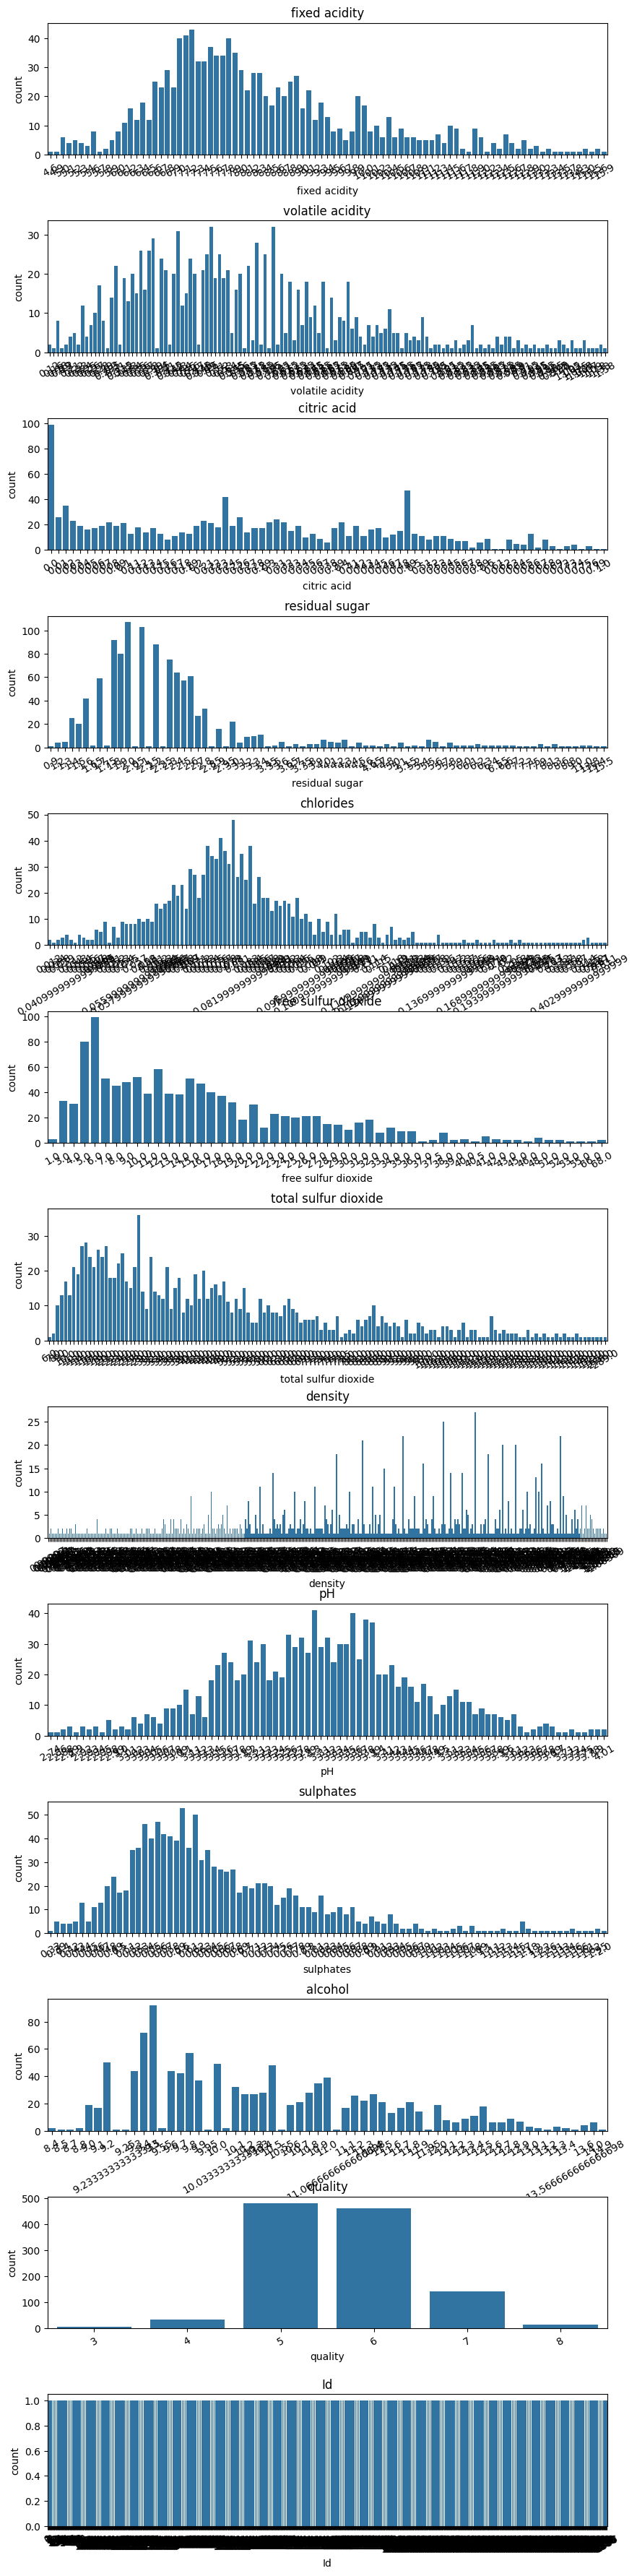

In [ ]:
#se comprueba que se puede iniciar el analisis de datos

#analisis de cadfa variable de manera individual 
 
cols_cat = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality','Id']

fig, ax = plt.subplots(nrows=len(cols_cat),ncols=1,figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i , col in enumerate(cols_cat):
    sns.countplot(x=col, data=data,ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)




$$observaciones$$

La variable fixed acidity tiene una distribución casi normal centrada entre 6 y 8.

Volatile acidity está sesgada a la derecha, con muchos valores bajos y pocos altos.

Citric acid presenta muchos valores cercanos a 0, pocos vinos tienen valores altos.

Residual sugar está sesgada a la derecha; la mayoría de vinos son secos (0–3 g/L).

Chlorides tiene forma de campana, concentrada entre 0.05 y 0.1.

Free sulfur dioxide está sesgada a la derecha, con la mayoría de valores entre 5 y 40.

Total sulfur dioxide también sesgada a la derecha, con mayoría entre 60 y 150.

Density está muy concentrada entre 0.990 y 1.003, con poca variación.

pH es casi normal, centrada alrededor de 3.3–3.4.

Sulphates sesgada a la derecha, con mayoría entre 0.4 y 0.7.

Alcohol muestra varios picos (multimodal), concentrado entre 9 y 11%.

Quality está desbalanceada: predominan los valores 5 y 6.

Id es solo un identificador único y no aporta información analítica.

In [ ]:
#eliminamos id ya que no es una variable  que nos ayude a mirar este problema

data.drop(columns=['Id'],inplace=True)
data.columns



Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


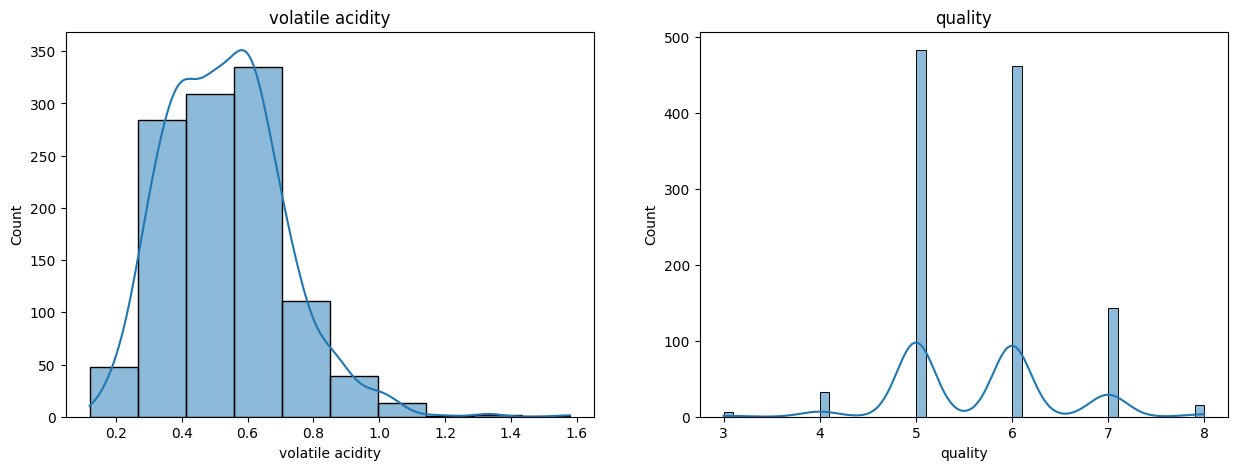

In [ ]:
#histogramas para ver como se comporta cada una 

col_num = ['volatile acidity', 'quality']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'volatile acidity':
        nbins = 10
    else:
        nbins = 50

    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)


    #normalmente si es alto el acides reduce la calidad 



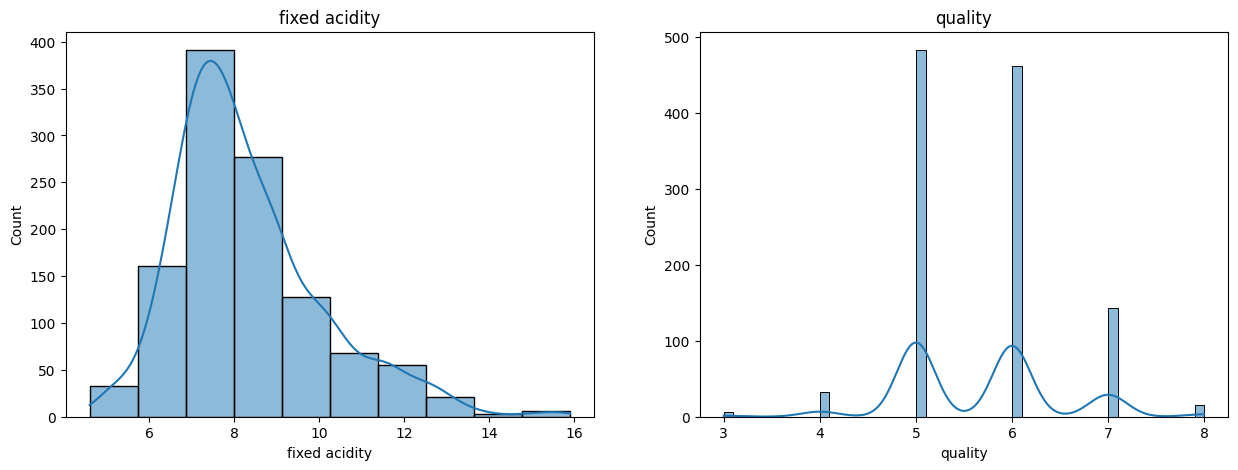

In [ ]:

col_num2 = ['fixed acidity','quality']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num2):
    if col == 'fixed acidity':
        nbins = 10
    else:
        nbins = 50

    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)

#algunos acidos afectan la calidad en exceso


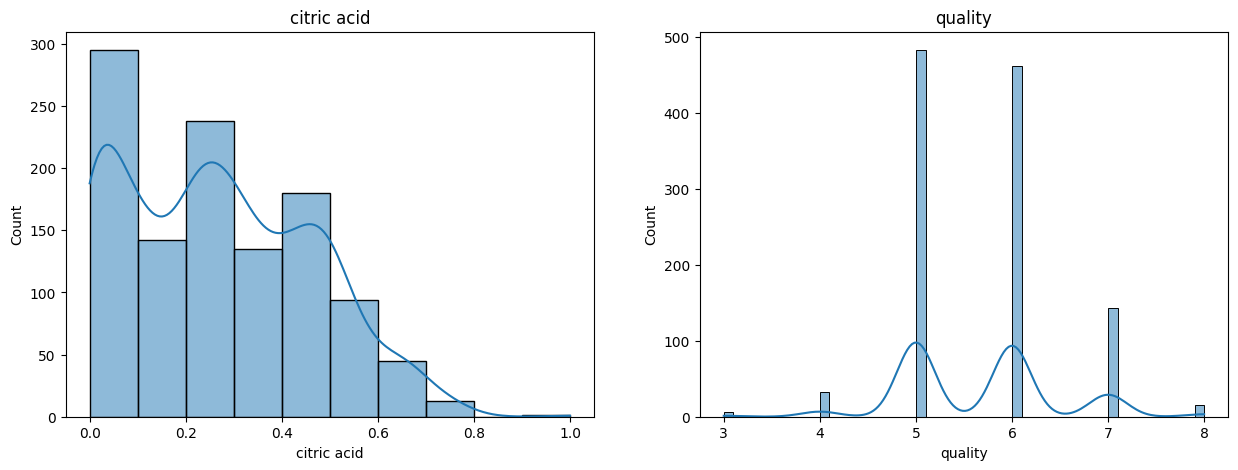

In [ ]:
col_num3 = ['citric acid','quality']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num3):
    if col == 'citric acid':
        nbins = 10
    else:
        nbins = 50

    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)

#citric acid puede mejorar la frescura
    

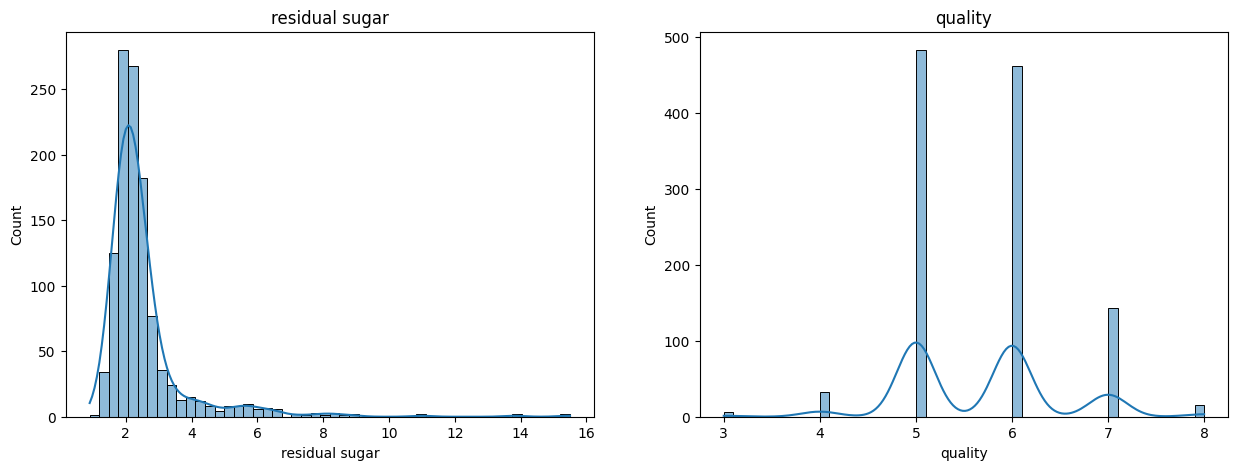

In [ ]:
col_num4 = ['residual sugar','quality']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num4):
    if col == 'total sulfur dioxide':
        nbins = 10
    else:
        nbins = 50

    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)


#ver si los vinos más dulces tienen mejor o peor valoración.


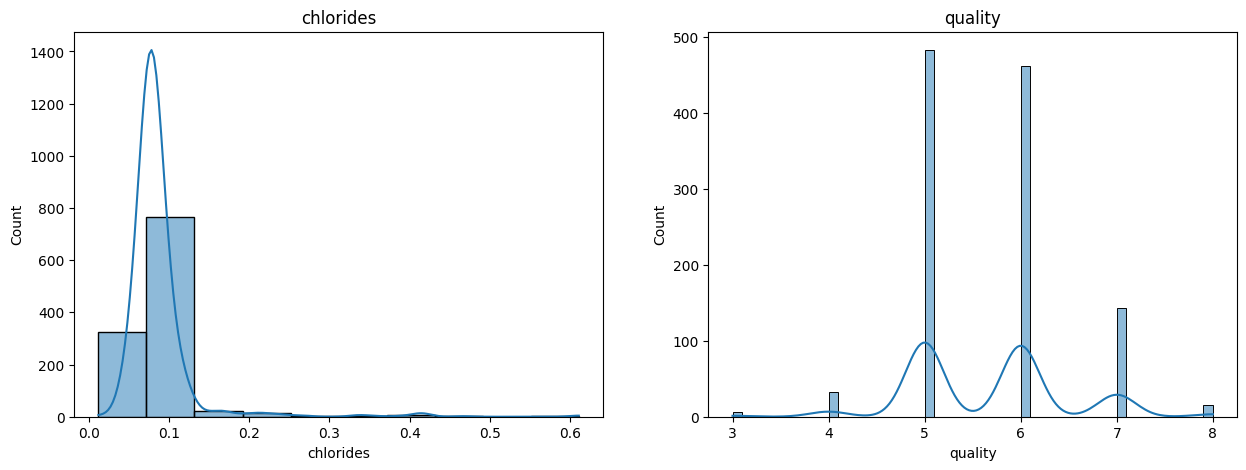

In [ ]:
col_num5 = ['chlorides','quality']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num5):
    if col == 'chlorides':
        nbins = 10
    else:
        nbins = 50

    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)

#el exceso de cloruros (salinidad) puede reducir la calidad.



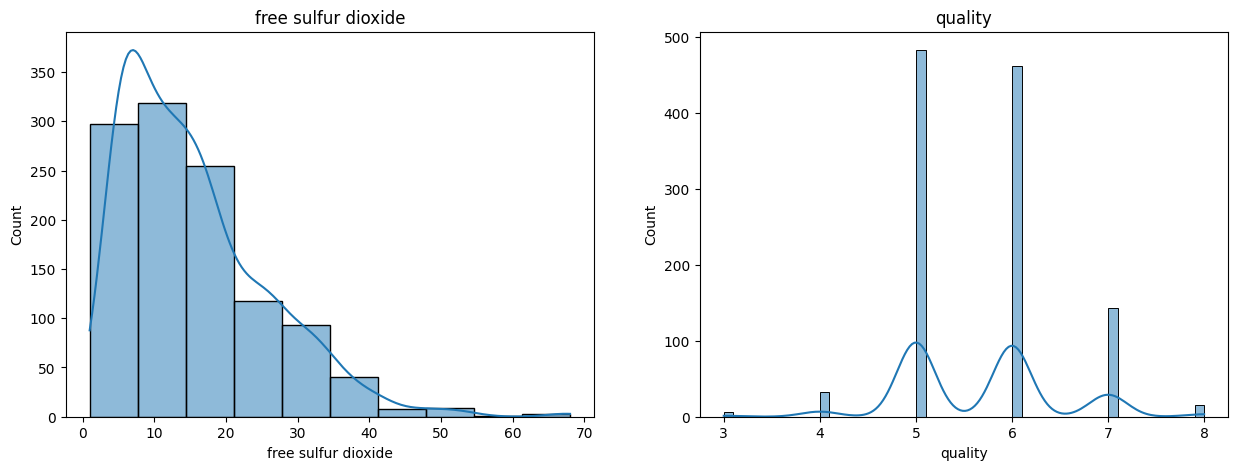

In [ ]:
col_num6 = ['free sulfur dioxide','quality']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num6):
    if col == 'free sulfur dioxide':
        nbins = 10
    else:
        nbins = 50

    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)


#niveles altos protegen el vino de oxidación, pero un exceso puede afectar aroma o sabor.


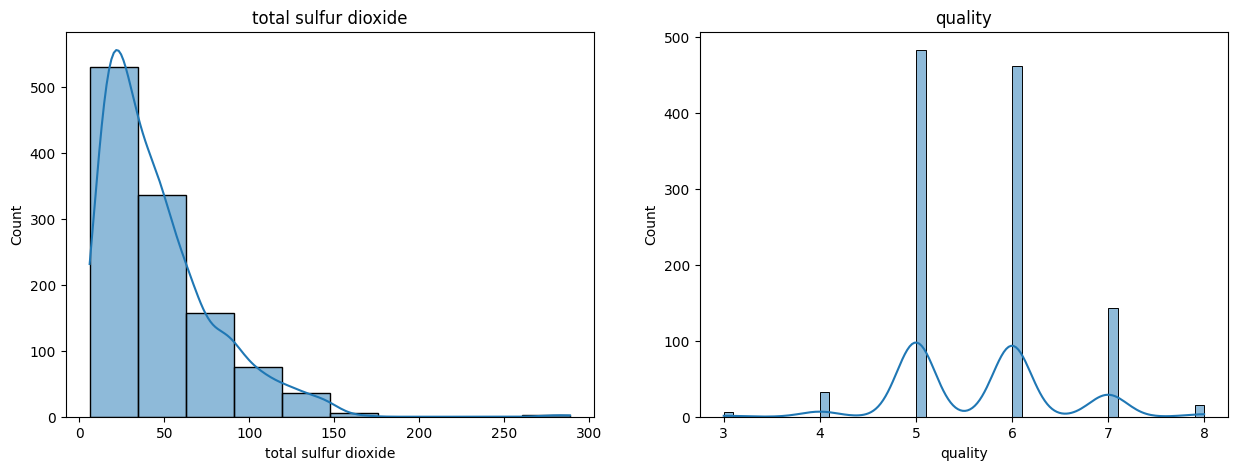

In [ ]:
col_num7 = ['total sulfur dioxide','quality']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num7):
    if col == 'total sulfur dioxide':
        nbins = 10
    else:
        nbins = 50

    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)

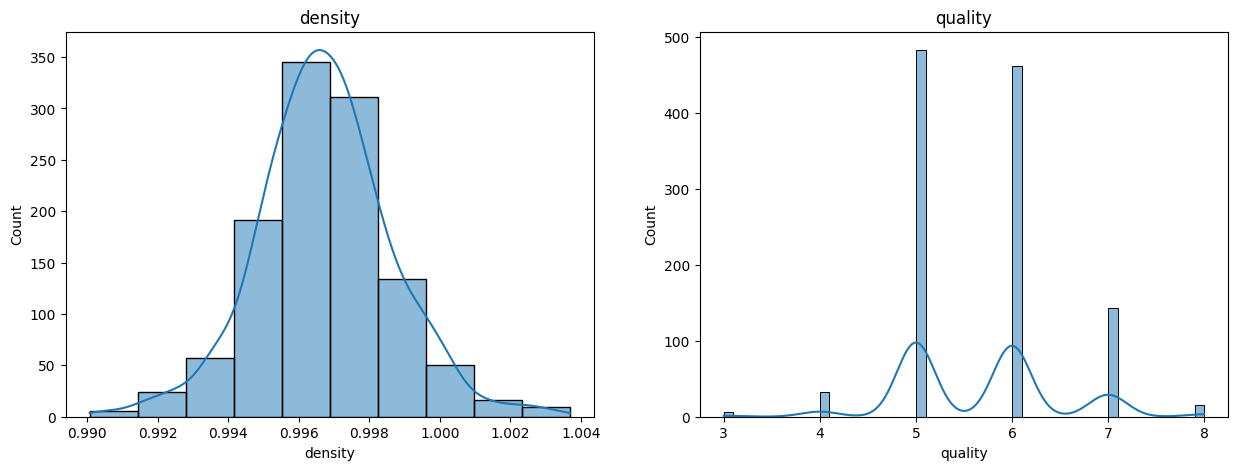

In [ ]:
col_num8 = ['density','quality']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num8):
    if col == 'density':
        nbins = 10
    else:
        nbins = 50

    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)


#los vinos de mejor calidad tienden a menor densidad



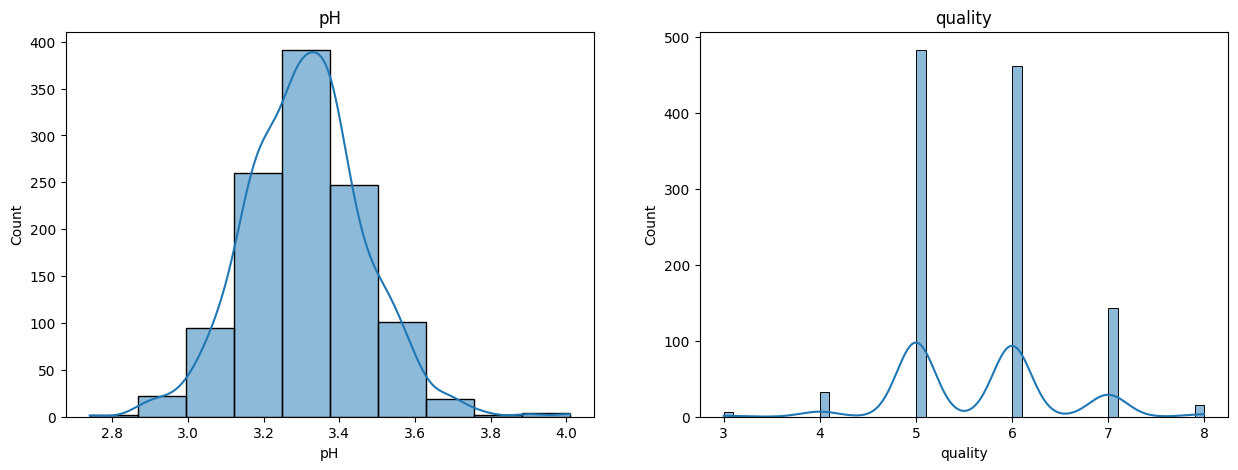

In [ ]:
col_num9 = ['pH','quality']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num9):
    if col == 'pH':
        nbins = 10
    else:
        nbins = 50

    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)


#el pH afecta la acidez general; hay un rango ideal de equilibrio


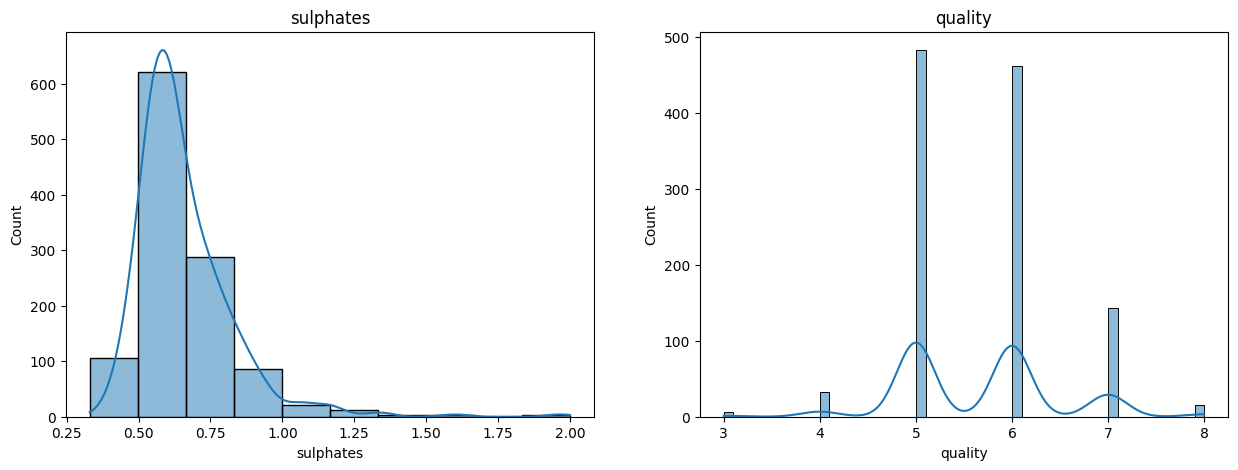

In [ ]:
col_num10 = ['sulphates','quality']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num10):
    if col == 'sulphates':
        nbins = 10
    else:
        nbins = 50

    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)


#actúan como conservante; valores moderados se asocian a buena calidad.


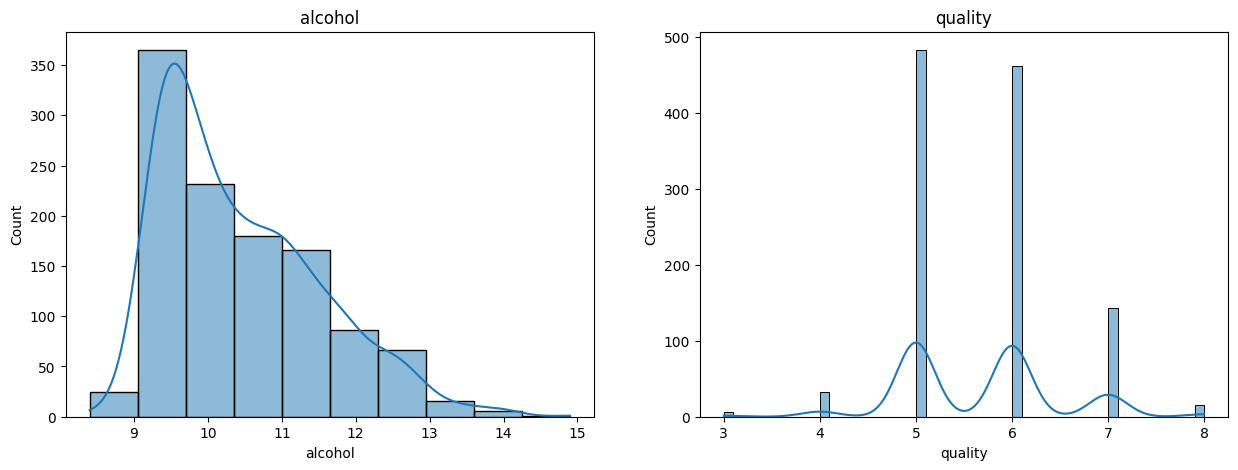

In [ ]:
col_num11 = ['alcohol','quality']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num11):
    if col == 'alcohol':
        nbins = 10
    else:
        nbins = 50

    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)

    #los vinos con más alcohol suelen tener mayor cuerpo y pueden ser mejor valorados.

In [ ]:
data['alcohol'].describe()

count    1143.000000
mean       10.442111
std         1.082196
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [ ]:
vinos_maxquality = data[data['quality'].isin([6, 7,8])]
promedios = vinos_maxquality.groupby('quality').mean(numeric_only=True)
print("\n Promedios de cada variable por calidad:")
display(promedios)


📈 Promedios de cada variable por calidad:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500



 Variables que más influyen positivamente en la calidad del vino:
quality                 1.000000
alcohol                 0.321372
citric acid             0.257868
sulphates               0.176645
fixed acidity           0.121402
residual sugar          0.103164
free sulfur dioxide    -0.029941
total sulfur dioxide   -0.037318
pH                     -0.099654
density                -0.109886
chlorides              -0.110975
volatile acidity       -0.294017
Name: quality, dtype: float64


C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\3368463995.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


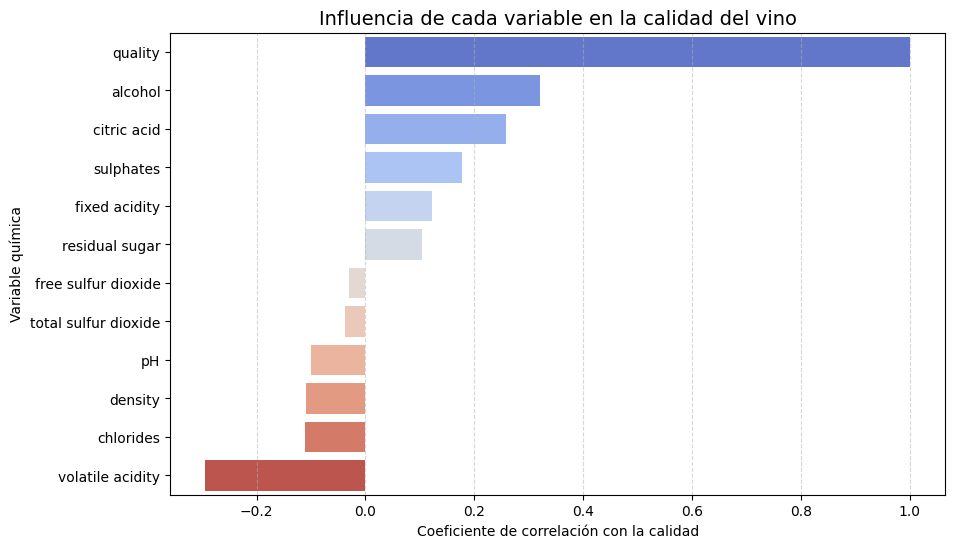

In [ ]:
correlaciones = data.corr(numeric_only=True)['quality'].sort_values(ascending=False)

# --- Mostramos las primeras correlaciones positivas ---
print("\n Variables que más influyen positivamente en la calidad del vino:")
print(correlaciones.head(12))

# --- Graficamos las correlaciones ---
plt.figure(figsize=(10,6))
sns.barplot(
    x=correlaciones.values, 
    y=correlaciones.index, 
    palette="coolwarm"
)
plt.title("Influencia de cada variable en la calidad del vino", fontsize=14)
plt.xlabel("Coeficiente de correlación con la calidad")
plt.ylabel("Variable química")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
data['volatile acidity'].describe()

count    1143.000000
mean        0.531339
std         0.179633
min         0.120000
25%         0.392500
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\1935930880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='quality', y=col, palette='magma')


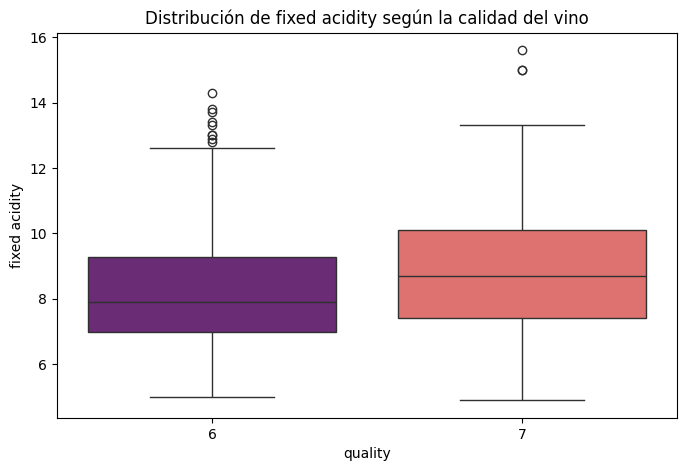

C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\1935930880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='quality', y=col, palette='magma')


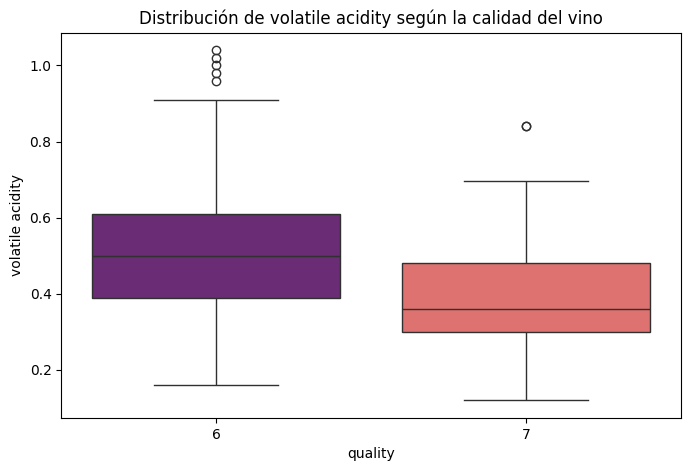

C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\1935930880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='quality', y=col, palette='magma')


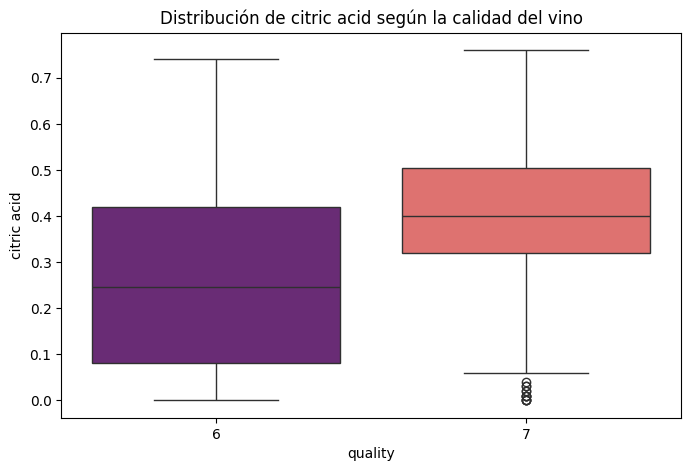

C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\1935930880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='quality', y=col, palette='magma')


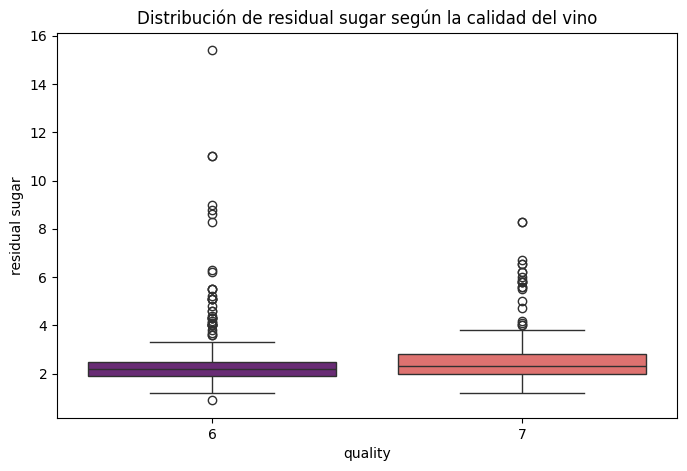

C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\1935930880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='quality', y=col, palette='magma')


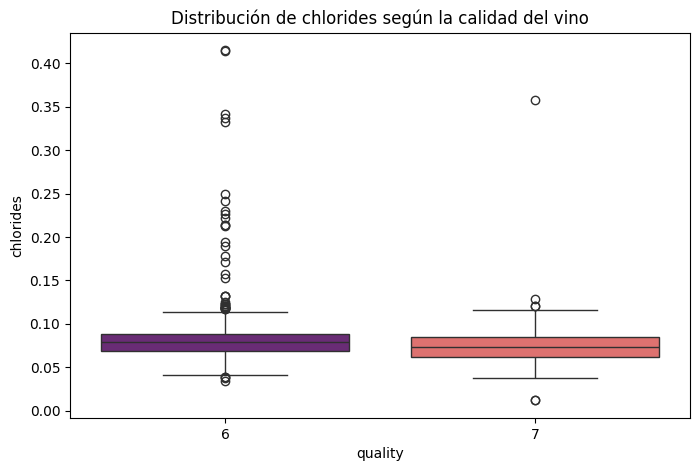

C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\1935930880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='quality', y=col, palette='magma')


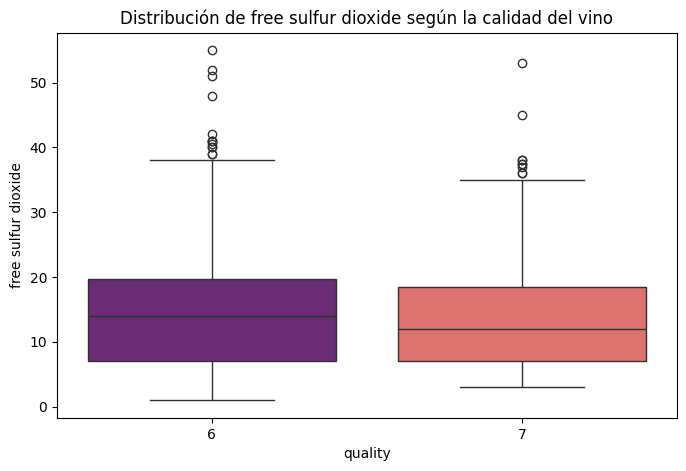

C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\1935930880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='quality', y=col, palette='magma')


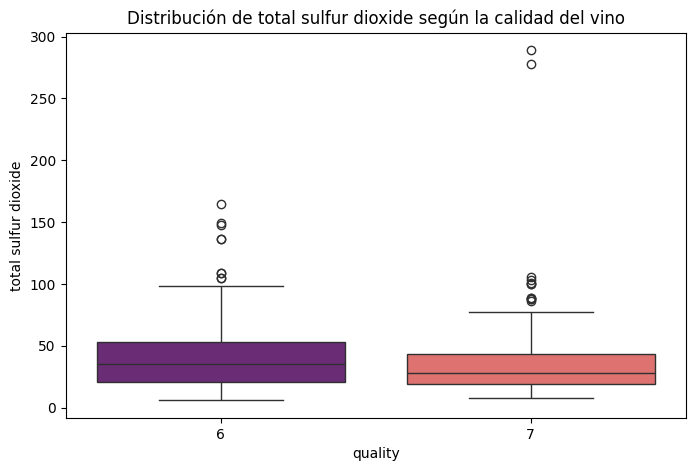

C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\1935930880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='quality', y=col, palette='magma')


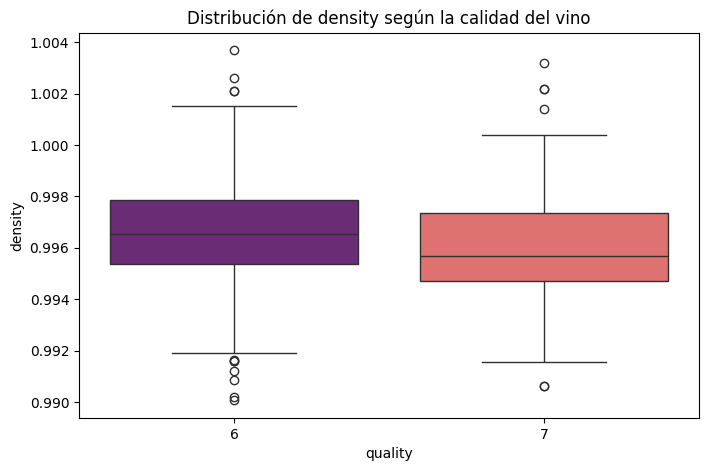

C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\1935930880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='quality', y=col, palette='magma')


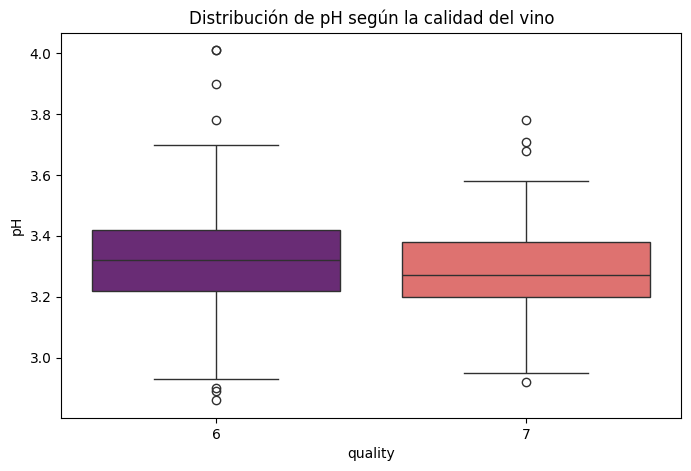

C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\1935930880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='quality', y=col, palette='magma')


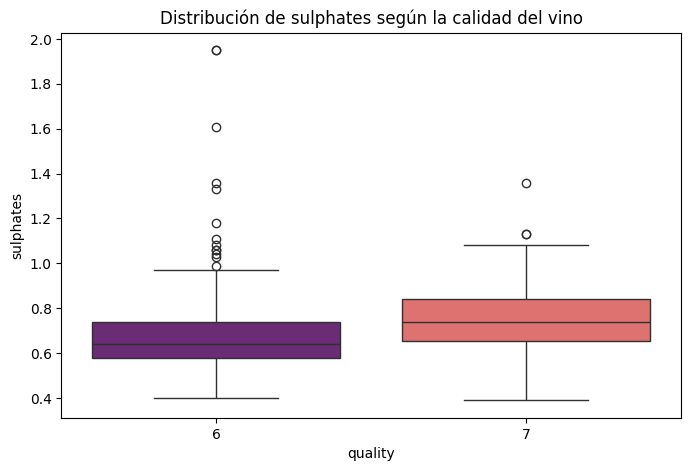

C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\1935930880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='quality', y=col, palette='magma')


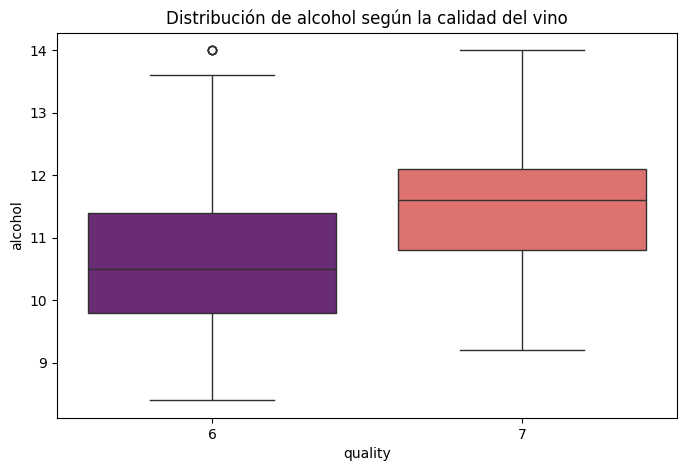

In [ ]:
variables = [col for col in data.columns if col not in ['quality']]

for col in variables:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=data, x='quality', y=col, palette='magma')
    plt.title(f"Distribución de {col} según la calidad del vino")
    plt.show()


# los circuloas reprecentan valores atipicos o outliner 


C:\Users\Sergio\AppData\Local\Temp\ipykernel_18692\690792740.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_alcohol, x='Calidad', y='Promedio_Alcohol (%)', palette='coolwarm')


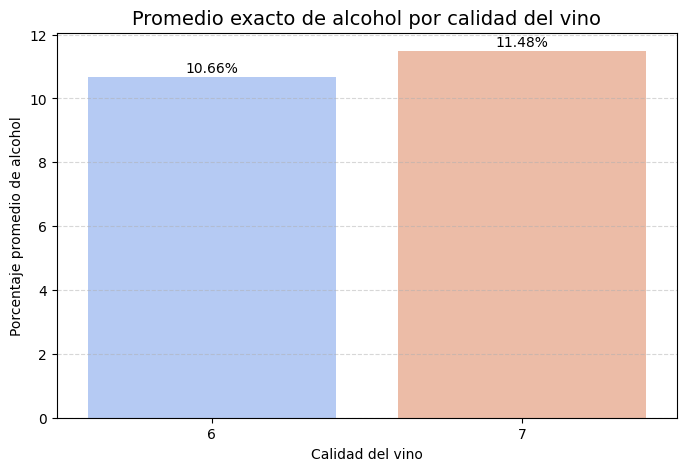

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=promedio_alcohol, x='Calidad', y='Promedio_Alcohol (%)', palette='coolwarm')

# Añadimos los valores encima de cada barra
for i, valor in enumerate(promedio_alcohol['Promedio_Alcohol (%)']):
    plt.text(i, valor + 0.05, f"{valor:.2f}%", ha='center', va='bottom', fontsize=10)

plt.title("Promedio exacto de alcohol por calidad del vino", fontsize=14)
plt.xlabel("Calidad del vino")
plt.ylabel("Porcentaje promedio de alcohol")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



# Neuronas Generacion (importaciones Escenciales)

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from tqdm import tqdm
tqdm.pandas()

# Carga de datos

In [ ]:

def cargar_datos(ruta_csv):
    if not os.path.exists(ruta_csv):
        raise FileNotFoundError(f"❌ No se encontró el archivo {ruta_csv}")
    print(f"✅ Cargando datos desde: {ruta_csv}\n")
    return pd.read_csv(ruta_csv)

def analizar_datos(df):
    print("\n=== INFORMACIÓN GENERAL DEL DATASET ===")
    print(df.info())
    print("\nPrimeras filas del dataset:")
    print(df.head())
    print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
    print(df.describe().T)
    print("\n=== VERIFICACIÓN DE VALORES NULOS ===")
    print(df.isnull().sum())

# Grafica de red Neuronal

In [ ]:
def graficar_arquitectura_por_neurona(capas, activaciones):
    """
    Dibuja la arquitectura de la red neuronal mostrando cada neurona y sus conexiones.
    """
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.axis('off')

    # Definir posición horizontal por capa
    n_capas = len(capas)
    x_spacing = 1.5

    # Limitar número de neuronas visibles por capa (para no saturar)
    max_neuronas_visibles = 12

    # Guardar posiciones de neuronas por capa
    posiciones = []
    for i, n_neuronas in enumerate(capas):
        n_dibujar = min(n_neuronas, max_neuronas_visibles)
        y_positions = np.linspace(0, n_capas, n_dibujar)
        posiciones.append([(i * x_spacing, y) for y in y_positions])

    # Dibujar conexiones entre neuronas de capas adyacentes
    for i in range(n_capas - 1):
        for (x1, y1) in posiciones[i]:
            for (x2, y2) in posiciones[i + 1]:
                ax.plot([x1, x2], [y1, y2], 'gray', lw=0.5, alpha=0.5)

    # Dibujar neuronas
    for i, capa in enumerate(posiciones):
        for (x, y) in capa:
            circle = plt.Circle((x, y), 0.1, color='deepskyblue', ec='navy', lw=1.2)
            ax.add_patch(circle)
        # Texto de capa
        ax.text(x, max(y for _, y in capa) + 0.5, f"{'Entrada' if i==0 else 'Salida' if i==len(capas)-1 else 'Oculta '+str(i)}\n({activaciones[i]})",
                ha='center', va='bottom', fontsize=9, fontweight='bold', color='darkblue')

    ax.set_xlim(-0.5, n_capas * x_spacing)
    ax.set_ylim(-1, n_capas + 1)
    ax.set_title("Arquitectura Neuronal Detallada", fontsize=14, fontweight='bold')
    plt.show()


# Red Neuronal desde cero

In [ ]:

def one_hot(y):
    clases = np.unique(y)
    indices = np.array([np.where(clases == v)[0][0] for v in y])
    return np.eye(len(clases))[indices], clases

def relu(z): return np.maximum(0, z)
def relu_d(z): return (z > 0).astype(float)

def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)
    e = np.exp(z)
    return e / np.sum(e, axis=1, keepdims=True)

class RedNeuronalProfunda:
    def __init__(self, n_entradas, n_salidas, capas_ocultas=(256,128,64),
                 lr=1e-4, drop=0.2, l2=1e-3, semilla=None):
        if semilla: np.random.seed(semilla)
        self.lr, self.drop, self.l2 = lr, drop, l2
        h1, h2, h3 = capas_ocultas
        self.W1 = np.random.randn(n_entradas, h1) * np.sqrt(2 / n_entradas)
        self.W2 = np.random.randn(h1, h2) * np.sqrt(2 / h1)
        self.W3 = np.random.randn(h2, h3) * np.sqrt(2 / h2)
        self.W4 = np.random.randn(h3, n_salidas) * np.sqrt(2 / h3)
        self.b1 = np.zeros((1,h1)); self.b2 = np.zeros((1,h2))
        self.b3 = np.zeros((1,h3)); self.b4 = np.zeros((1,n_salidas))
        self.m, self.v = {}, {}
        for k, v in self.parametros().items():
            self.m[k] = np.zeros_like(v)
            self.v[k] = np.zeros_like(v)
        self.t = 0; self.b1m, self.b2m, self.eps = 0.9, 0.999, 1e-8

    def parametros(self):
        return {'W1':self.W1,'b1':self.b1,'W2':self.W2,'b2':self.b2,
                'W3':self.W3,'b3':self.b3,'W4':self.W4,'b4':self.b4}

    def forward(self, X, entrenar=False):
        Z1 = X @ self.W1 + self.b1; A1 = relu(Z1)
        if entrenar and self.drop>0:
            A1 *= (np.random.rand(*A1.shape)>self.drop)/(1-self.drop)
        Z2 = A1 @ self.W2 + self.b2; A2 = relu(Z2)
        Z3 = A2 @ self.W3 + self.b3; A3 = relu(Z3)
        Z4 = A3 @ self.W4 + self.b4
        A4 = softmax(Z4)
        return A4, (X,Z1,A1,Z2,A2,Z3,A3,Z4,A4)

    def backward(self, cache, Y):
        X,Z1,A1,Z2,A2,Z3,A3,Z4,A4 = cache
        m = X.shape[0]
        dZ4 = (A4 - Y) / m
        dW4 = A3.T @ dZ4 + self.l2 * self.W4
        db4 = np.sum(dZ4, 0, keepdims=True)
        dA3 = dZ4 @ self.W4.T * relu_d(Z3)
        dW3 = A2.T @ dA3 + self.l2 * self.W3
        db3 = np.sum(dA3, 0, keepdims=True)
        dA2 = dA3 @ self.W3.T * relu_d(Z2)
        dW2 = A1.T @ dA2 + self.l2 * self.W2
        db2 = np.sum(dA2, 0, keepdims=True)
        dA1 = dA2 @ self.W2.T * relu_d(Z1)
        dW1 = X.T @ dA1 + self.l2 * self.W1
        db1 = np.sum(dA1, 0, keepdims=True)
        grads = {'W1':dW1,'b1':db1,'W2':dW2,'b2':db2,
                 'W3':dW3,'b3':db3,'W4':dW4,'b4':db4}
        self._actualizar_pesos(grads)

    def _actualizar_pesos(self, grads):
        self.t += 1
        for k, g in grads.items():
            self.m[k] = self.b1m * self.m[k] + (1-self.b1m)*g
            self.v[k] = self.b2m * self.v[k] + (1-self.b2m)*(g*g)
            mhat = self.m[k]/(1-self.b1m**self.t)
            vhat = self.v[k]/(1-self.b2m**self.t)
            setattr(self, k, getattr(self,k) - self.lr*mhat/(np.sqrt(vhat)+self.eps))

    def predecir(self, X):
        A, _ = self.forward(X)
        return np.argmax(A, axis=1), A


# Entrenamiento

In [ ]:
def balancear_datos(df, columna='quality'):
    mayor = df[columna].value_counts().idxmax()
    n = df[columna].value_counts()[mayor]
    # Incrementamos las clases minoritarias
    conjuntos = [resample(g, replace=True, n_samples=n, random_state=42)
                 if len(g)<n else g for _,g in df.groupby(columna)]
    return pd.concat(conjuntos).sample(frac=1, random_state=42).reset_index(drop=True)

def entrenar_red(Xt,Yt,Xv,Yv,epocas=400,batch=32,lr=1e-4,drop=0.1,semilla=None):
    red = RedNeuronalProfunda(Xt.shape[1], Yt.shape[1], lr=lr, drop=drop, semilla=semilla)
    mejor_perdida = np.inf; paciencia = 0
    for ep in range(1,epocas+1):
        indices = np.random.permutation(len(Xt))
        for i in range(0,len(Xt),batch):
            xb, yb = Xt[indices[i:i+batch]], Yt[indices[i:i+batch]]
            salida, cache = red.forward(xb, entrenar=True)
            red.backward(cache, yb)
        salida_val, _ = red.forward(Xv)
        perdida = -np.mean(np.sum(Yv*np.log(salida_val+1e-12), axis=1))
        if ep % 40 == 0:
            exactitud = np.mean(np.argmax(salida_val,1)==np.argmax(Yv,1))
            print(f"Época {ep}/{epocas} – Pérdida {perdida:.4f} – Exactitud {exactitud:.4f}")
        if perdida < mejor_perdida - 1e-6:
            mejor_perdida = perdida; paciencia = 0
        else:
            paciencia += 1
        # Si no mejora en 60 épocas, detener entrenamiento
        if paciencia > 60:
            print("⏹️ Early stopping en época", ep)
            break
    return red

def main():
    ruta = "WineQT.csv"
    df = cargar_datos(ruta)
    analizar_datos(df)
    graficos_exploratorios(df)

    df_bal = balancear_datos(df)
    print("\nDataset balanceado:\n", df_bal['quality'].value_counts().sort_index())

    X = df_bal.drop(columns=['quality']).values
    y = df_bal['quality'].values

    # Mostrar arquitectura detallada por neurona
    graficar_arquitectura_por_neurona(
        capas=[X.shape[1], 8, 6, len(np.unique(y))],
        activaciones=["Entrada", "ReLU", "ReLU", "Softmax"]
    )

    #Se separa el dataset en entrenamiento y validacion
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    esc = StandardScaler()
    X_train = esc.fit_transform(X_train)
    X_val = esc.transform(X_val)
    Y_train, _ = one_hot(y_train)
    Y_val, _ = one_hot(y_val)

    ensamble = 5
    print(f"\n🧩 Entrenando ensemble de {ensamble} redes neuronales...\n")
    predicciones = np.zeros((len(X_val), Y_val.shape[1]))
    for i in range(ensamble):
        print(f"🧠 Entrenando red neuronal {i+1}/{ensamble}")
        modelo = entrenar_red(X_train, Y_train, X_val, Y_val, semilla=42 + i * 5)
        _, proba = modelo.predecir(X_val)
        predicciones += proba

    predicciones /= ensamble
    precision_final = np.mean(np.argmax(predicciones, 1) == np.argmax(Y_val, 1))
    print(f"\n✅ Precisión final del ensemble: {precision_final * 100:.2f}%")

if __name__ == "__main__":
    main()
